<a href="https://colab.research.google.com/github/MuhammadAbbas01/Predict-Child-Mortality/blob/main/unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting Child Mortality Using Unsupervised Learning on Socio-Economic Data**

# **Submitted by: M ABBAS**

## Table of Contents

1. [Introduction](#introduction)
    
2. [Objectives](#objectives)
    
3. [Data Cleaning and Preprocessing](#data-cleaning-and-preprocessing)
    
   - 3.1 - [Handling Missing Values](#handling-missing-values)  
   - 3.2 - [Removing Duplicates](#removing-duplicates)
       
4. [Exploratory Data Analysis](#exploratory-data-analysis)
    
5. [Correlation Analysis](#correlation-analysis)
    
6. [Checking for and Addressing Skewness](#checking-for-and-addressing-skewness)
    
7. [Feature Scaling](#feature-scaling)
    
8. [Modeling](#modeling)
   - 8.1 - [KMeans Clustering](#kmeans-clustering)  
   - 8.2 - [Agglomerative Clustering](#agglomerative-clustering)  
   - 8.3 - [Gaussian Mixture Model (GMM)](#gaussian-mixture-model-gmm)  
   - 8.4 - [DBSCAN Clustering](#dbscan-clustering)
       
9. [Conclusion](#conclusion)
    
10. [Next Steps](#next-steps)
    
11. [Key Insights](#key-insights)
    
12. [Suggestions](#suggestions)

# 1. Introduction

This project aims to predict child mortality rates using unsupervised learning models based on various features such as exports, health, imports, income, inflation, life expectancy, total fertility rate, and GDP. By applying clustering algorithms like KMeans, Agglomerative Clustering, GMM, and DBSCAN, we will explore patterns in the data and assess which models provide meaningful groupings of countries in relation to child mortality rates.

# 2. Objectives

- Identify key factors influencing child mortality rates.
- Cluster countries based on socioeconomic and health features.
- Evaluate the performance of unsupervised models (KMeans, Agglomerative, GMM, DBSCAN).
- Gain insights into the relationship between features and child mortality.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score


In [ ]:
from google.colab import files
import pandas as pd

# Upload the file
uploaded = files.upload()

# Load the CSV file into a DataFrame (use the file name after upload)
df = pd.read_csv('Country-data.csv')  # Use the file name here
df.head()  # Display the first few rows of the DataFrame

Saving Country-data.csv to Country-data.csv


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


# 3. Data Cleaning and Preprocessing

In [ ]:
df.shape

(167, 10)

In [ ]:
df.dtypes

,0
country,object
child_mort,float64
exports,float64
health,float64
imports,float64
income,int64
inflation,float64
life_expec,float64
total_fer,float64
gdpp,int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


## 3.1- Checking for Null

In [ ]:
df['inflation'].isnull().sum()

0

#### The above output show that there is no null value.

## 3.2 -  Checking for Duplicate

In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
162,False
163,False
164,False
165,False


#### the above output give us all False.that mean there is no duplicated rows.

In [ ]:
df.describe()[1:].T.style.background_gradient(cmap='Blues', axis=1)

,mean,std,min,25%,50%,75%,max
child_mort,38.270060,40.328931,2.600000,8.250000,19.300000,62.100000,208.000000
exports,41.108976,27.412010,0.109000,23.800000,35.000000,51.350000,200.000000
health,6.815689,2.746837,1.810000,4.920000,6.320000,8.600000,17.900000
imports,46.890215,24.209589,0.065900,30.200000,43.300000,58.750000,174.000000
income,17144.688623,19278.067698,609.000000,3355.000000,9960.000000,22800.000000,125000.000000
inflation,7.781832,10.570704,-4.210000,1.810000,5.390000,10.750000,104.000000
life_expec,70.555689,8.893172,32.100000,65.300000,73.100000,76.800000,82.800000
total_fer,2.947964,1.513848,1.150000,1.795000,2.410000,3.880000,7.490000
gdpp,12964.155689,18328.704809,231.000000,1330.000000,4660.000000,14050.000000,105000.000000


In [ ]:
df.select_dtypes(include = ['object']).describe().T

,count,unique,top,freq
country,167,167,Afghanistan,1


# 4 - Exploratory Data Analysis

In [ ]:
!pip install plotly

In [ ]:
import plotly.express as px


# List of columns to visualize
columns = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

# Define color scale
colors = ["rgb(255, 51, 51)", "rgb(210, 231, 154)", "rgb(94, 179, 39)", "rgb(67, 136, 33)", "rgb(33, 74, 12)"]

# Create and display choropleth maps for each column
for i in columns:
    fig = px.choropleth(df,
                        locationmode='country names',
                        locations='country',
                        color=i,
                        title=f'Show the differences in Countries by {i}',
                        color_continuous_scale=colors)
    fig.show()

In [ ]:
import plotly.express as px
import plotly.io as pio
fig2 = px.scatter(df, x='gdpp', y='inflation', color='country', title='gdpp & inflation',template = 'plotly_white')
fig2.show()

In [ ]:
fig1 = px.bar(df, x='income', y='country', color='inflation',color_continuous_scale="ice",template='plotly_white')
fig1.update_layout(autosize=False, width=1200, height=800)
fig1.show()

In [ ]:

# Select the top 40 countries by life expectancy
top_countries = df.nlargest(40, 'life_expec')

# Create a sunburst chart
fig = px.sunburst(
    top_countries,
    path=["country"],
    values="life_expec",
    color="gdpp",
    color_continuous_scale="Viridis",
    title="Top 40 Countries with the Highest Life Expectancy"
)

# Update the layout
fig.update_layout(
    title_font=dict(size=20),
    margin=dict(t=50, b=50, l=0, r=0),
    width=1000,
    height=800
)

# Show the chart
fig.show()

In [ ]:

# Select the top 40 countries by income
top_countries = df.nlargest(40, 'income')

# Create a sunburst chart
fig = px.sunburst(
    top_countries,
    path=["country"],
    values="income",
    color="gdpp",
    color_continuous_scale="blues",
    title="Top 40 Countries with the Highest Income"
)

# Update the layout
fig.update_layout(width=1000,
                  height=800,
                  margin=dict(t=50, b=50, l=0, r=0),)
# Show the chart
fig.show()

In [ ]:
top_countries = df.nlargest(40, 'inflation')

# Create a sunburst chart
fig = px.sunburst(
    top_countries,
    path=["country"],
    values="inflation",
    color="health",
    color_continuous_scale="blues",
    title="Top 40 Countries with the Highest Inflation"
    )

fig.update_layout(
    title_font=dict(size=20),
    margin=dict(t=50, b=50, l=0, r=0),
    width=1000,
    height=800
)

<Axes: >

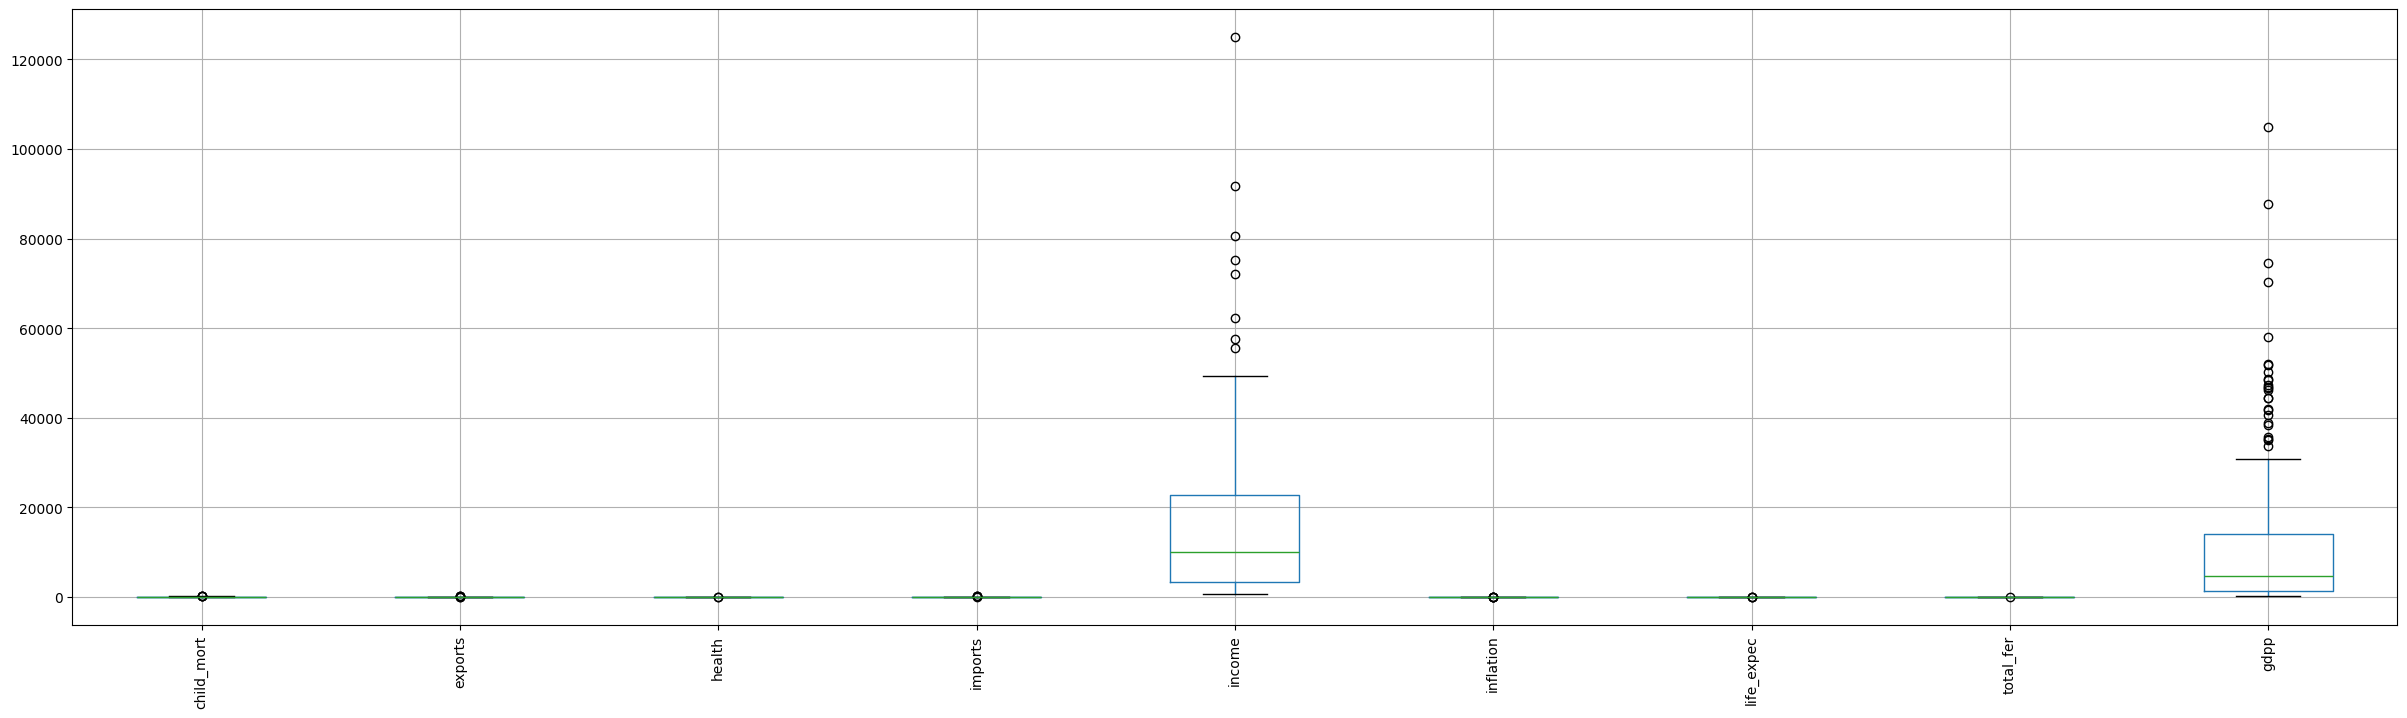

In [ ]:
df.boxplot(rot=90 , figsize=(30,8))

# 5 - Correlation Analysis

In [ ]:
float_columns = [x for x in df.columns if x not in ['country']]

# The correlation matrix
corr_mat = df[float_columns].corr()

# Strip out the diagonal values for the next step
for x in range(len(float_columns)):
    corr_mat.iloc[x,x] = 0.0

corr_mat

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,0.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,0.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,0.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,0.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,0.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,0.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,0.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,0.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,0.000000


In [ ]:
fig = px.imshow(corr_mat, text_auto=True,aspect="auto", color_continuous_scale='Blues')
fig.show()

# Correlation Matrix Summary

- **Child Mortality** is negatively correlated with **income** (-0.524) and **life expectancy** (-0.887), and strongly positively correlated with **total fertility rate** (0.848).
- **Income** shows a strong positive correlation with **GDP per capita** (0.896) and **life expectancy** (0.612).
- **Exports** and **Imports** are moderately correlated (0.737).
- **Inflation** has weak to moderate negative correlations with most features, showing the lowest with **GDP per capita** (-0.222).

In [ ]:
# Pairwise maximal correlations
corr_mat.abs().idxmax()

,0
child_mort,life_expec
exports,imports
health,gdpp
imports,exports
income,gdpp
inflation,total_fer
life_expec,child_mort
total_fer,child_mort
gdpp,income


# Feature Pairs of Interest

- **Child Mortality** and **Life Expectancy**
- **Exports** and **Imports**
- **Health** and **GDP per Capita**
- **Imports** and **Exports**
- **Income** and **GDP per Capita**
- **Inflation** and **Total Fertility Rate**
- **Life Expectancy** and **Child Mortality**
- **Total Fertility Rate** and **Child Mortality**
- **GDP per Capita** and **Income**

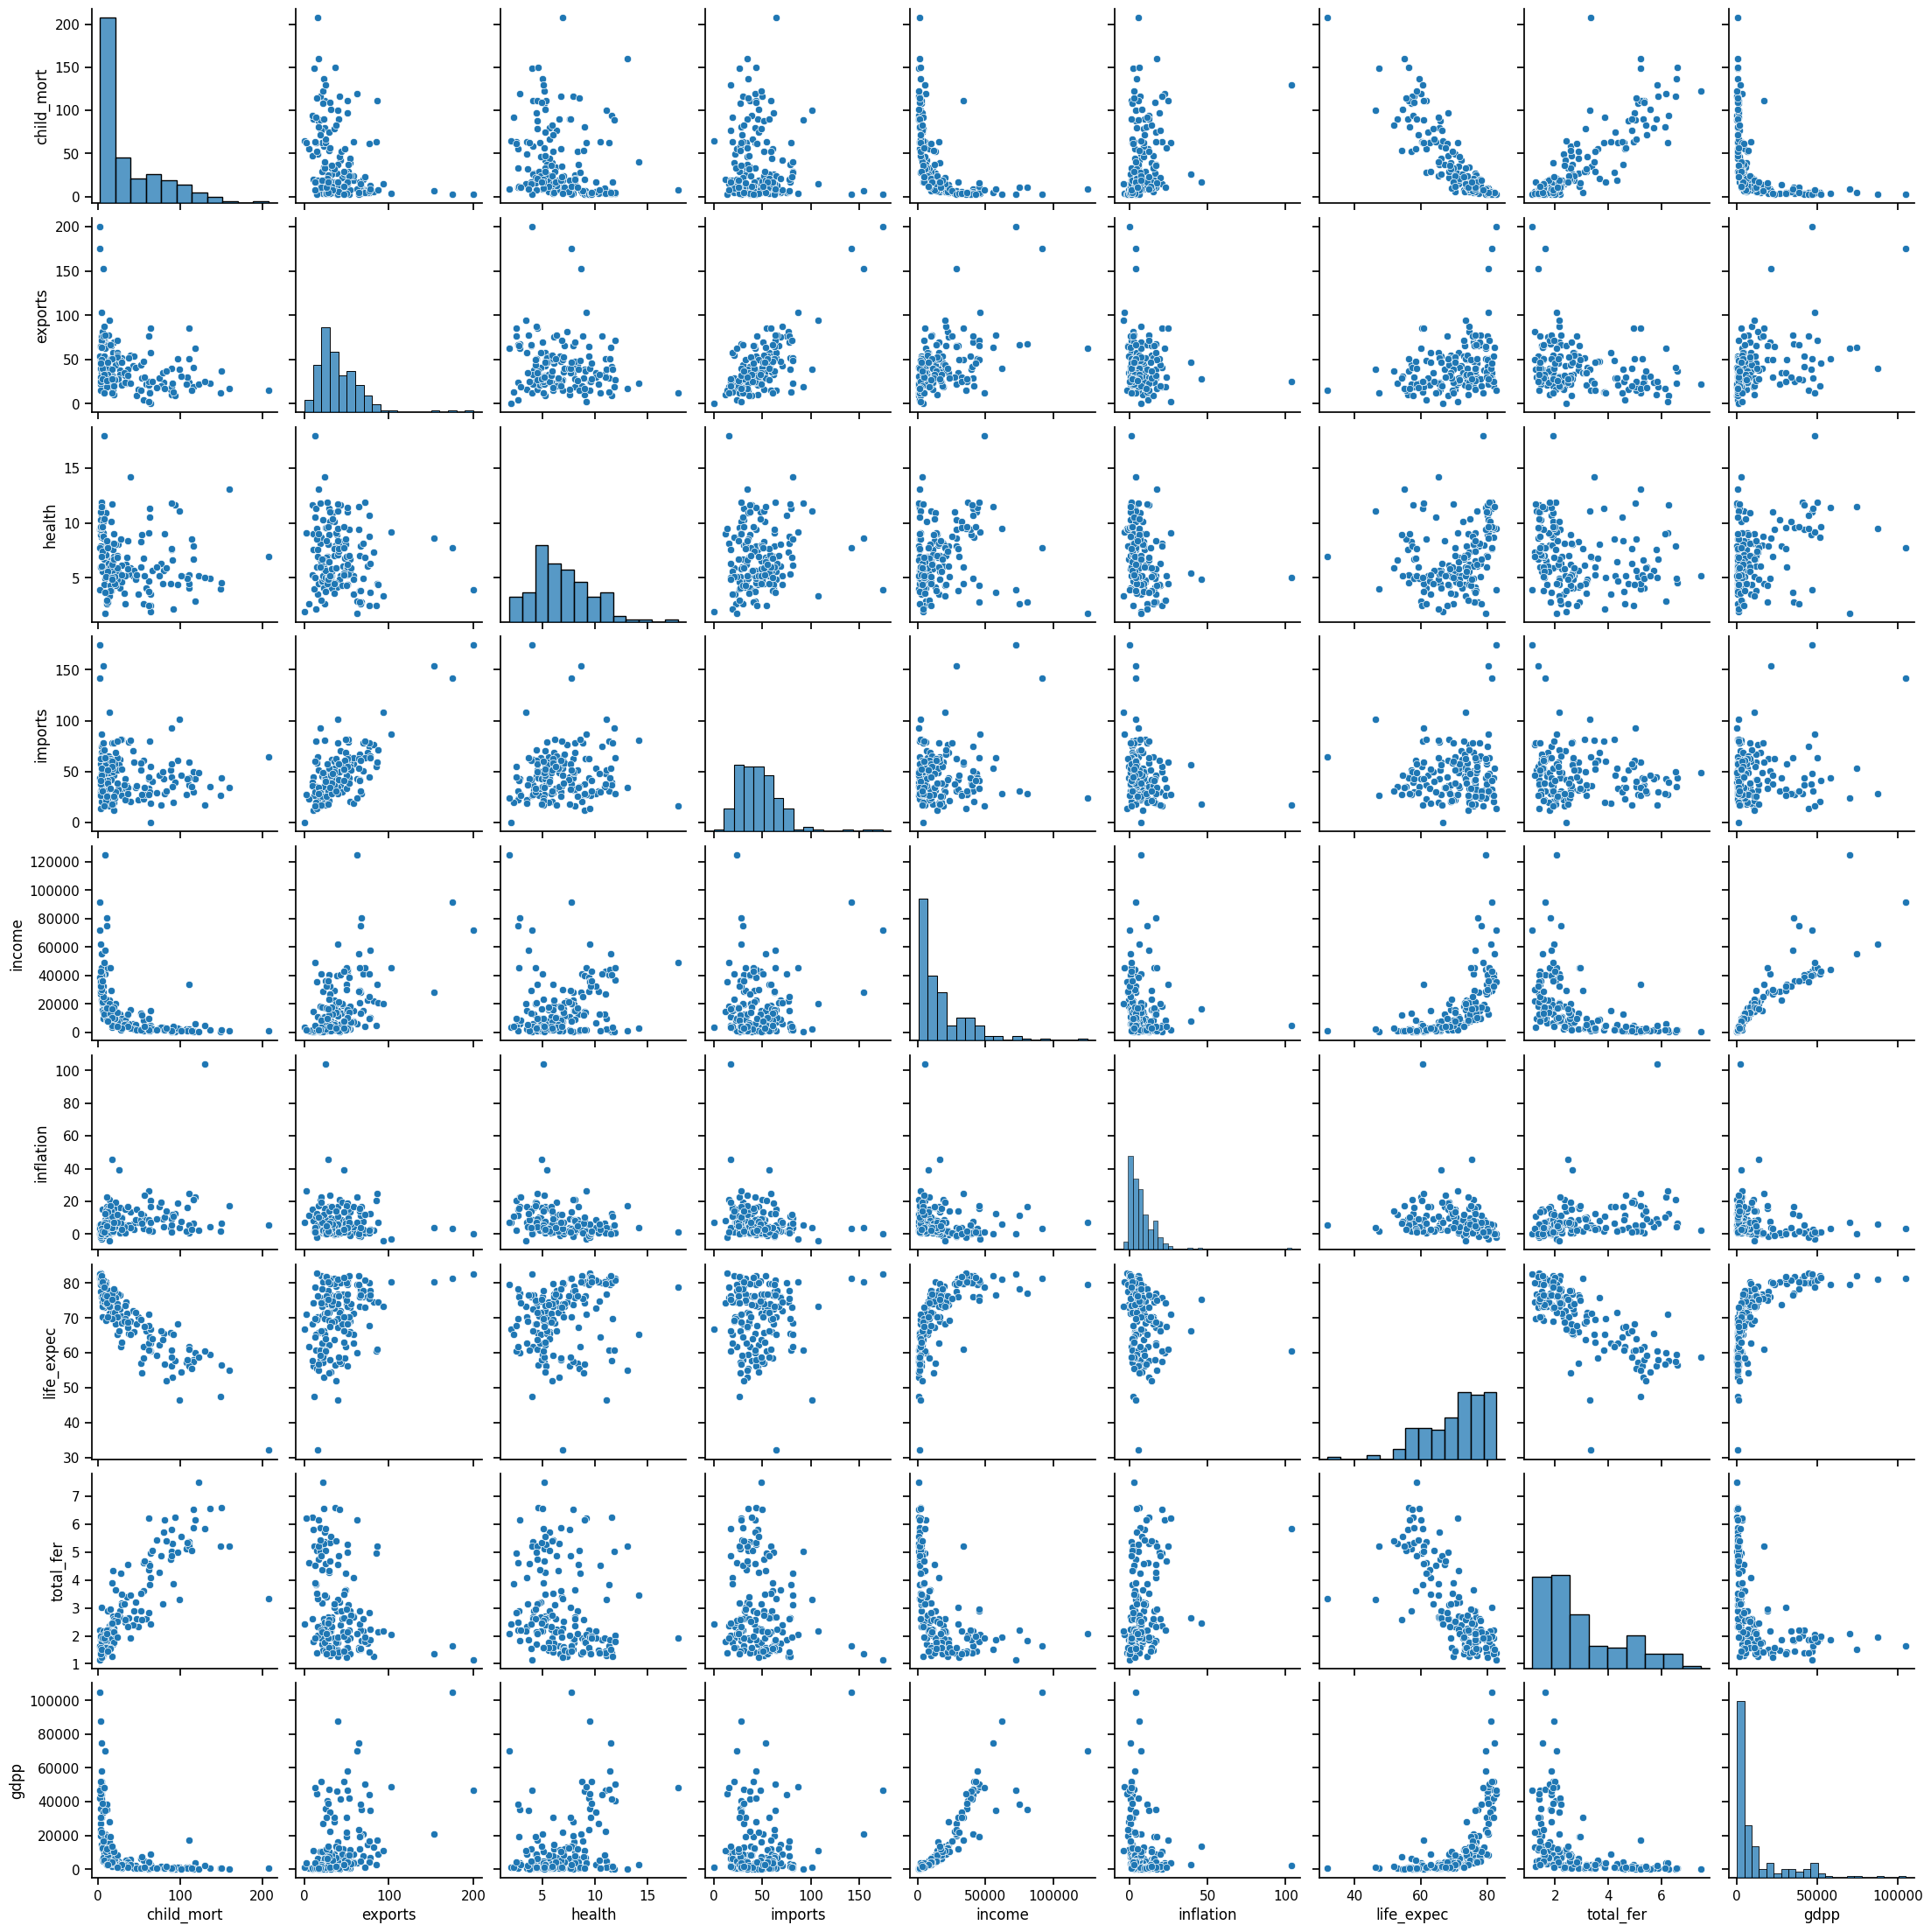

In [ ]:
# Set the context for the plot
sns.set_context('notebook')

# Create the pairplot
sns.pairplot(df[float_columns])

# Display the plot
plt.show()

# 6 - Checking Skewness

In [ ]:
#skewness of all columns...
skew_limit = 0.75  # Define a limit above which we will log transform
skew_vals = df[float_columns].skew()

# Showing the skewed columns
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0: 'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))
print("Skewed columns:\n", skew_cols)

Skewed columns:
                 Skew
inflation   5.154049
exports     2.445824
income      2.231480
gdpp        2.218051
imports     1.905276
child_mort  1.450774
total_fer   0.967092
life_expec -0.970996


In [ ]:
# Apply log transformation to the skewed columns
for col in skew_cols.index:
    df[col] = np.log1p(df[col])  # log1p is used to handle zero values

# Check skewness after log transformation
skew_vals_after = df[skew_cols.index].skew()
skew_cols_after = (skew_vals_after
                   .sort_values(ascending=False)
                   .to_frame()
                   .rename(columns={0: 'Skew'}))
print("Skewed columns after log transformation:\n", skew_cols_after)

Skewed columns after log transformation:
                 Skew
total_fer   0.540171
child_mort  0.066160
gdpp        0.006548
income     -0.235823
exports    -1.088961
inflation  -1.300086
life_expec -1.626466
imports    -1.822794


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning:

invalid value encountered in log1p



#### Skewness is remove from these features. the result is above

In [ ]:
# Define the features and target
X = df[['exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']]
y = df['child_mort']

X.tail()

,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
162,3.862833,5.25,3.983413,7.989899,1.286474,4.158883,1.504077,7.996654
163,3.384390,4.91,2.923162,9.711176,3.848018,4.335983,1.244155,9.510519
164,4.290459,6.84,4.396915,8.409831,2.572612,4.305416,1.081805,7.178545
165,3.433987,5.18,3.566712,8.407602,3.202746,4.226834,1.735189,7.178545
166,3.637586,5.89,3.462606,8.095904,2.708050,3.970292,1.856298,7.286876


# 7 - Feature Scaling

In [ ]:
# Standardizing the features
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.7643134 ,  0.27908825,  0.14786752, ..., -1.58159894,
         1.73481749, -1.46030093],
       [-0.28387175, -0.09701618,  0.29183453, ...,  0.63084985,
        -0.94433634, -0.12283509],
       [ 0.18416071, -0.96607302, -0.49894589, ...,  0.64983413,
         0.14356389, -0.06491589],
       ...,
       [ 1.12595811,  0.0088773 ,  1.20720632, ...,  0.3202341 ,
        -0.64038275, -0.88408862],
       [-0.18202254, -0.59727159, -0.33450023, ..., -0.25709919,
         1.21142769, -0.88408862],
       [ 0.12890814, -0.33801514, -0.52782708, ..., -2.14188885,
         1.55467254, -0.8116217 ]])

# 8 - Modeling

In [ ]:
from sklearn.decomposition import PCA

# Reduce dimensions to 2 for visualization or more for clustering
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)



In [ ]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
x_train.shape

(125, 8)

In [ ]:
y_train.shape

(125,)

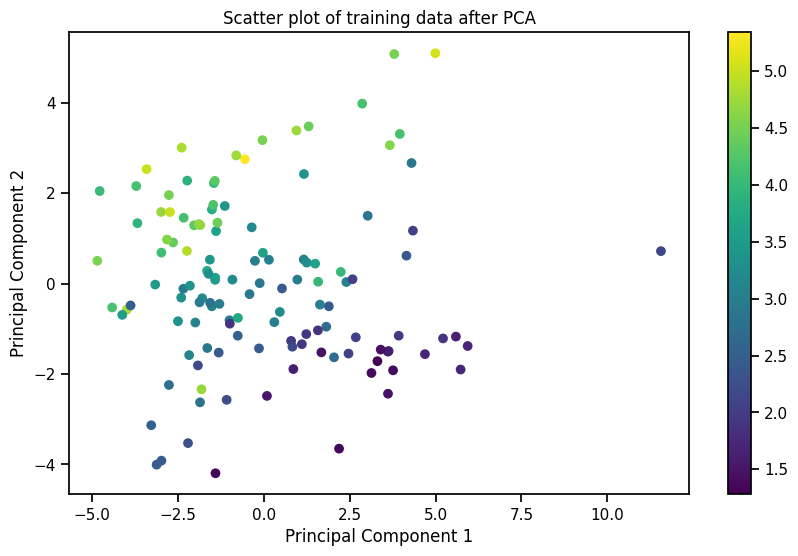

In [ ]:
# Performing PCA
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

# Visualizing the data
plt.figure(figsize=(10, 6))
plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_train, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter plot of training data after PCA')
plt.colorbar()
plt.show()

## 8.1 - KMeans

### KMean 8.1.1

In [ ]:
# Define the features and target
from sklearn.cluster import KMeans



# Initialize and fit the KMeans model with n_init set to 10
km = KMeans(n_clusters=2, random_state=42, n_init=10)
km.fit(x_train_pca)

# Predict the clusters for the test set
y_test_pred = km.predict(x_test_pca)

# Create a new DataFrame to store the test set and predictions
test_results = x_test.copy()
#test_results['child_mort'] = y_test
test_results['kmeans'] = y_test_pred

print(test_results.head())

      exports  health   imports     income  inflation  life_expec  total_fer  \
150  3.718438    7.65  4.065602   7.099202   0.779325    4.089332   1.769855   
56   3.210844    5.69  3.777348   7.415175   1.667707    4.197202   1.903599   
123  4.147885    1.81  3.210844  11.736077   2.076938    4.388257   1.121678   
60   3.139833   10.30  3.456317  10.264687   0.514618    4.399375   0.908259   
100  3.955082    6.00  4.146304   9.674137   0.756122    4.309456   0.943906   

          gdpp  kmeans  
150   6.192362       0  
56    6.333280       0  
123  11.160541       0  
60   10.199919       1  
100   8.987322       0  


In [ ]:
# Merge the predictions back into the original DataFrame
df.loc[test_results.index, 'kmeans'] = test_results['kmeans']


In [ ]:
(df[['country','kmeans']]
 .groupby(['kmeans','country'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))



number
kmeans country                      
0.0    Bolivia                     1
       Bulgaria                    1
       Congo, Dem. Rep.            1
       Dominican Republic          1
       Estonia                     1
       Gabon                       1
       Gambia                      1
       Grenada                     1
       Guinea                      1
       Libya                       1
       Malawi                      1
       Maldives                    1
       Mali                        1
       Mauritius                   1
       Mozambique                  1
       Myanmar                     1
       Namibia                     1
       Qatar                       1
       Sudan                       1
       Thailand                    1
       Togo                        1
       Tonga                       1
       Turkmenistan                1
       Yemen                       1
1.0    Argentina                   1
       Australia                   1
       Austria                     1
       Burundi                     1
       Chile                       1
       Denmark                     1
       France                      1
       Greece                      1
       Ireland                     1
       Israel                      1
       Lebanon                     1
       Micronesia, Fed. Sts.       1
       Portugal                    1
       Serbia                      1
       Slovenia                    1
       Spain                       1
       Timor-Leste                 1
       Ukraine                     1

### KMean 8.1.2

In [ ]:

# Initialize list to store inertia values
km_list = list()

# Test cluster sizes from 1 to 20
for n_clusters in range(1, 21):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(x_train)

    # Append data as pd.Series
    km_list.append(pd.Series({'clusters': n_clusters,
                                  'inertia': kmeans.inertia_,
                                  'model': kmeans}))

# Convert list of pd.Series to DataFrame
inertia_df = pd.DataFrame(km_list)

In [ ]:
inertia_df

,clusters,inertia,model
0,1,1551.272990,"KMeans(n_clusters=1, n_init=10, random_state=42)"
1,2,867.734847,"KMeans(n_clusters=2, n_init=10, random_state=42)"
2,3,699.876898,"KMeans(n_clusters=3, n_init=10, random_state=42)"
3,4,557.580180,"KMeans(n_clusters=4, n_init=10, random_state=42)"
4,5,455.623883,"KMeans(n_clusters=5, n_init=10, random_state=42)"
5,6,407.577386,"KMeans(n_clusters=6, n_init=10, random_state=42)"
6,7,352.064399,"KMeans(n_clusters=7, n_init=10, random_state=42)"
7,8,313.983643,"KMeans(n_init=10, random_state=42)"
8,9,289.932676,"KMeans(n_clusters=9, n_init=10, random_state=42)"
9,10,260.273396,"KMeans(n_clusters=10, n_init=10, random_state=42)"


The KMeans clustering results indicate that as the number of clusters increases from 1 to 20, the inertia decreases, reflecting improved clustering performance. The most significant drop in inertia occurs between 1 and 3 clusters, suggesting that the optimal number of clusters may lie within this range.

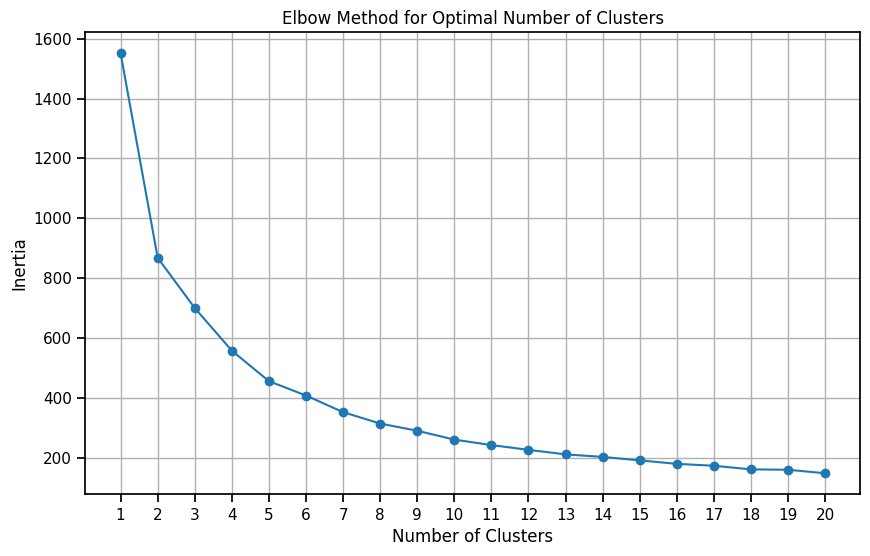

In [ ]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(inertia_df['clusters'], inertia_df['inertia'], marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 21))
plt.grid(True)
plt.show()

In [ ]:
pip install --upgrade setuptools

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:

pip install yellowbrick

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import yellowbrick
print(yellowbrick.__version__)

1.5


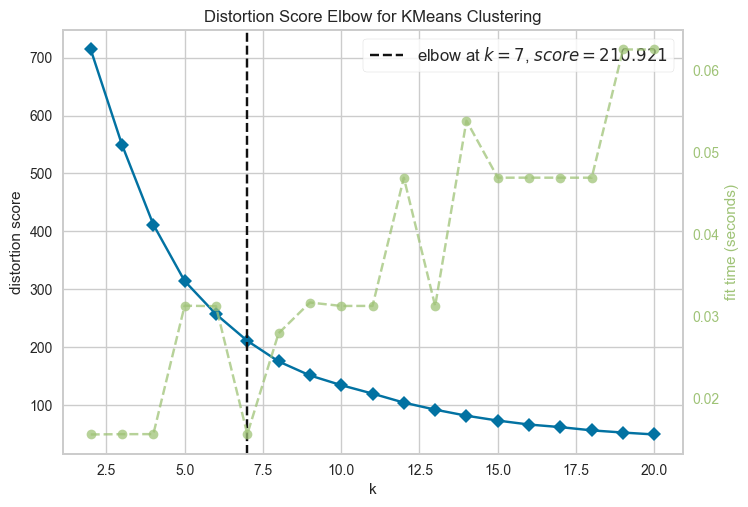

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

model = KMeans(n_init=10)  # Set n_init explicitly to suppress the warning
visualizer = KElbowVisualizer(model, k=(2, 21), timings=True)
visualizer.fit(x_train_pca)  # Replace df3 with your DataFrame
visualizer.show()

### KMeans 8.1.3

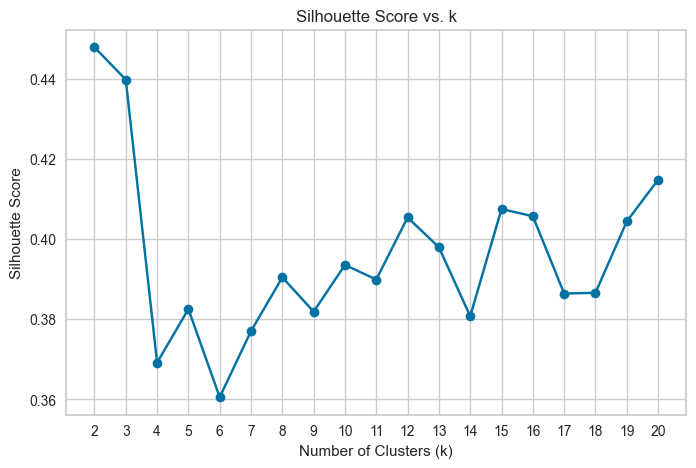

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

# Compute Silhouette Scores for each k
for k in range(2, 21):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(x_train_pca)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(x_train_pca, labels))

# Plot Silhouette Scores vs. k
plt.figure(figsize=(8, 5))
plt.plot(range(2, 21), silhouette_scores, marker='o')
plt.title('Silhouette Score vs. k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 21))
plt.show()

In [ ]:
silhouette_scores

[0.44780600012331434,
 0.43972924078608233,
 0.3691723706892127,
 0.38251544384116143,
 0.3605445670458616,
 0.37703995368609877,
 0.3904378756080732,
 0.3818733541435416,
 0.3935328515474597,
 0.389886441034606,
 0.4053559458663349,
 0.39793774941140314,
 0.38073649943456206,
 0.407467912041316,
 0.40567598921240716,
 0.386398379297228,
 0.3865743132256598,
 0.4043787469441965,
 0.41475695913278693]

The Silhouette Scores for KMeans clustering show a range of values, with the highest score of approximately 0.447 indicating that clusters are well-defined. Most scores hover around 0.39 to 0.41, suggesting reasonable clustering performance, while lower scores indicate some overlapping clusters.

In [ ]:
labels = kmeans.labels_

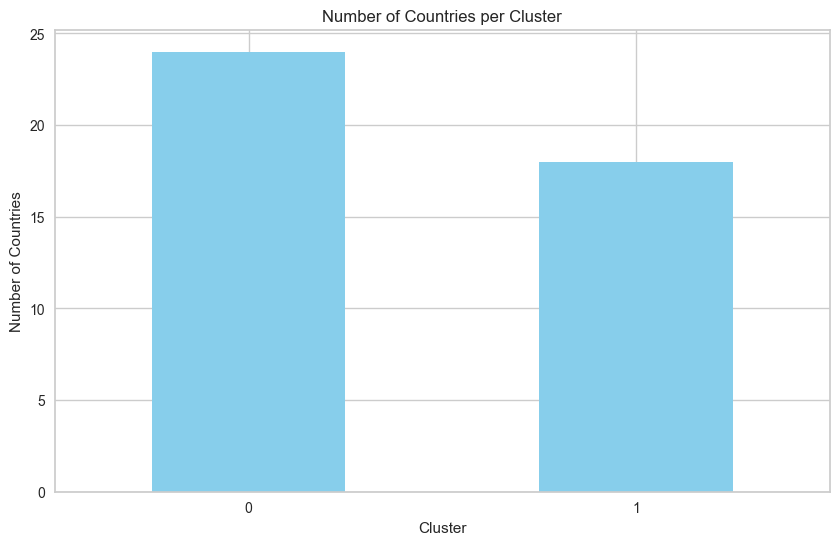

In [ ]:
import matplotlib.pyplot as plt

# Count the number of countries per cluster
cluster_counts = test_results['kmeans'].value_counts().sort_index()

# Plot the distribution
plt.figure(figsize=(10, 6))
cluster_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Countries per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Countries')
plt.xticks(rotation=0)
plt.show()

## 8.2 - AgglomerativeClustering

### 8.2.1

In [ ]:
from sklearn.cluster import AgglomerativeClustering
### BEGIN SOLUTION
ag = AgglomerativeClustering(n_clusters=2, linkage='ward', compute_full_tree=True)
ag = ag.fit(x_train_pca)
# Predict the clusters for the test set
y_test_pred =  ag.fit_predict(x_test_pca)

# Create a new DataFrame to store the test set and predictions
test_results = x_test.copy()
#test_results['child_mort'] = y_test
test_results['agglom'] = y_test_pred

print(test_results.head())

      exports  health   imports     income  inflation  life_expec  total_fer  \
150  3.718438    7.65  4.065602   7.099202   0.779325    4.089332   1.769855   
56   3.210844    5.69  3.777348   7.415175   1.667707    4.197202   1.903599   
123  4.147885    1.81  3.210844  11.736077   2.076938    4.388257   1.121678   
60   3.139833   10.30  3.456317  10.264687   0.514618    4.399375   0.908259   
100  3.955082    6.00  4.146304   9.674137   0.756122    4.309456   0.943906   

          gdpp  agglom  
150   6.192362       0  
56    6.333280       0  
123  11.160541       0  
60   10.199919       1  
100   8.987322       0  


In [ ]:
# Merge the predictions back into the original DataFrame
df.loc[test_results.index, 'agglom'] = test_results['agglom']


In [ ]:


(df[['country','agglom']]
 .groupby(['agglom','country'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))

number
agglom country                      
0.0    Argentina                   1
       Bolivia                     1
       Bulgaria                    1
       Chile                       1
       Congo, Dem. Rep.            1
       Dominican Republic          1
       Estonia                     1
       Gabon                       1
       Gambia                      1
       Grenada                     1
       Guinea                      1
       Israel                      1
       Lebanon                     1
       Libya                       1
       Malawi                      1
       Maldives                    1
       Mali                        1
       Mauritius                   1
       Mozambique                  1
       Myanmar                     1
       Namibia                     1
       Qatar                       1
       Sudan                       1
       Thailand                    1
       Togo                        1
       Tonga                       1
       Turkmenistan                1
       Ukraine                     1
       Yemen                       1
1.0    Australia                   1
       Austria                     1
       Burundi                     1
       Denmark                     1
       France                      1
       Greece                      1
       Ireland                     1
       Micronesia, Fed. Sts.       1
       Portugal                    1
       Serbia                      1
       Slovenia                    1
       Spain                       1
       Timor-Leste                 1

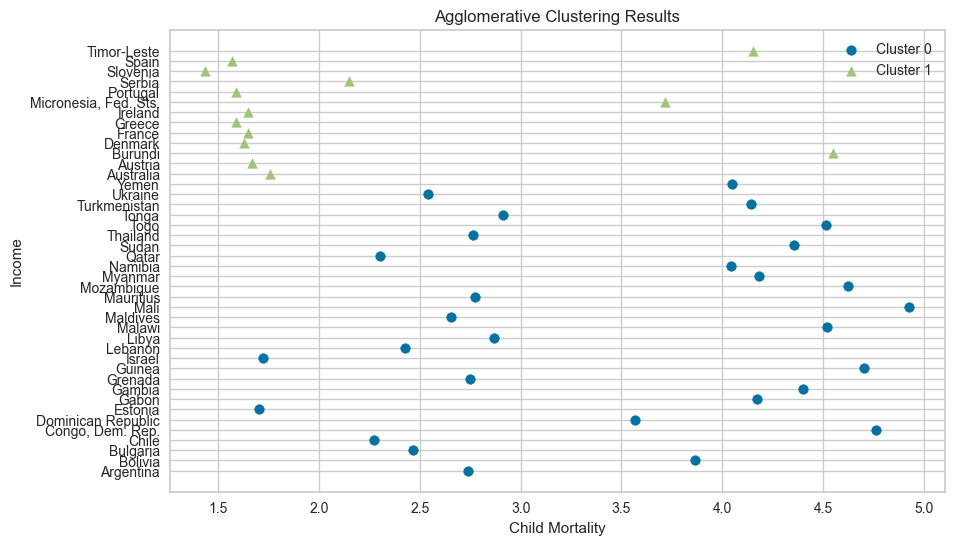

In [ ]:
# Separate the data into clusters
cluster_0 = df.loc[df['agglom'] == 0]
cluster_1 = df.loc[df['agglom'] == 1]

# Plot the data points
plt.figure(figsize=(10, 6))
plt.scatter(cluster_0['child_mort'], cluster_0['country'], marker='o', label='Cluster 0')
plt.scatter(cluster_1['child_mort'], cluster_1['country'], marker='^', label='Cluster 1')
plt.xlabel('Child Mortality')
plt.ylabel('Income')
plt.legend()
plt.title('Agglomerative Clustering Results')
plt.show()

### 8.2.2

Best K: 3, Best Silhouette Score: 0.43115904737464883


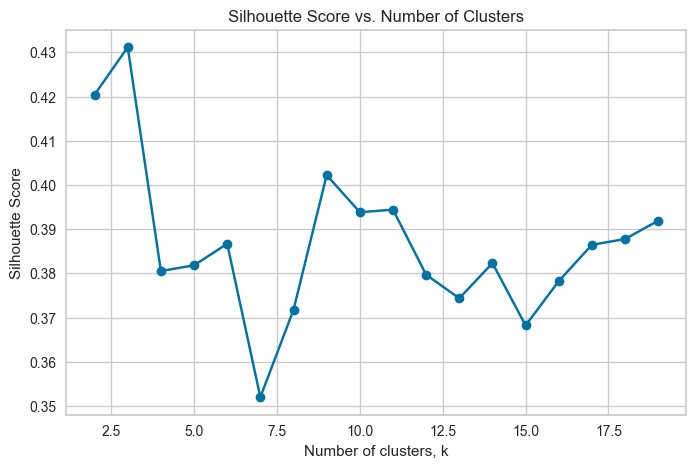

In [ ]:
from sklearn.metrics import silhouette_score


best_k = 0
best_score = -1
silhouette_scores = []

for k in range(2, 20):
    ag = AgglomerativeClustering(n_clusters=k)
    labels = ag.fit_predict(x_train_pca)
    score = silhouette_score(x_train_pca, labels)
    silhouette_scores.append(score)
    if score > best_score:
        best_k = k
        best_score = score

print(f"Best K: {best_k}, Best Silhouette Score: {best_score}")

# Plot Silhouette Scores vs. k
plt.figure(figsize=(8, 5))
plt.plot(range(2, 20), silhouette_scores, marker='o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()


For Agglomerative clustering, the best number of clusters is 3, yielding a Silhouette Score of approximately 0.431. This score indicates a moderate level of cluster separation, suggesting that the clusters are reasonably distinct.

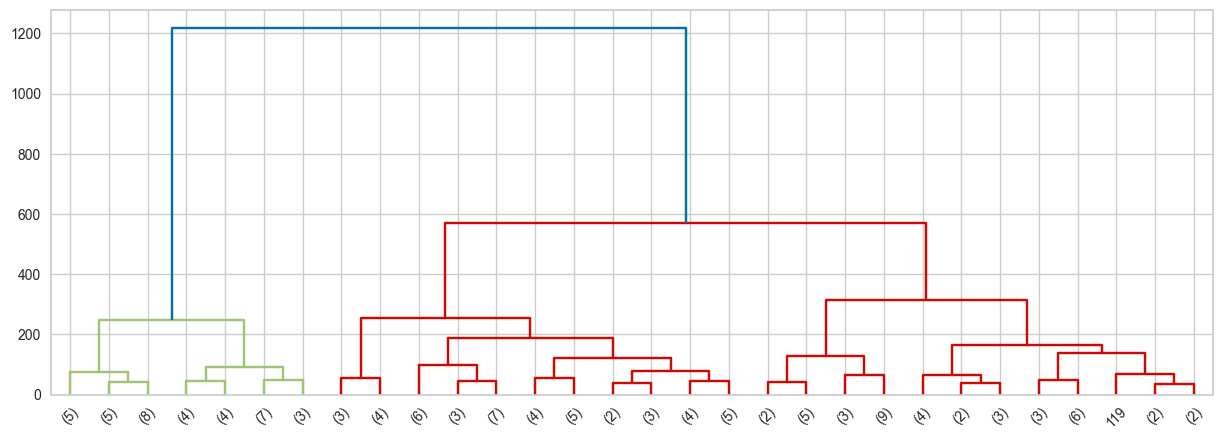

In [ ]:
from scipy.cluster import hierarchy

# Compute the linkage matrix
Z = hierarchy.linkage(ag.children_, method='ward')

# Create the plot
fig, ax = plt.subplots(figsize=(15, 5))

# Plot the dendrogram
den = hierarchy.dendrogram(Z, orientation='top',
                           p=30, truncate_mode='lastp',
                           show_leaf_counts=True, ax=ax)

# Show the plot
plt.show()

## 8.3 - GaussianMixture

In [ ]:
from sklearn.mixture import GaussianMixture

### 8.3.1

In [ ]:
# Specify the number of clusters
n_clusters = 2

# Apply GMM clustering
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
gmm = gmm.fit(x_train_pca)

# Predict the clusters for the test set
y_test_pred = gmm.predict(x_test_pca)

# Create a new DataFrame to store the test set and predictions
test_results =x_test.copy()
test_results['gmm_cluster'] = y_test_pred

print(test_results.head())

      exports  health   imports     income  inflation  life_expec  total_fer  \
150  3.718438    7.65  4.065602   7.099202   0.779325    4.089332   1.769855   
56   3.210844    5.69  3.777348   7.415175   1.667707    4.197202   1.903599   
123  4.147885    1.81  3.210844  11.736077   2.076938    4.388257   1.121678   
60   3.139833   10.30  3.456317  10.264687   0.514618    4.399375   0.908259   
100  3.955082    6.00  4.146304   9.674137   0.756122    4.309456   0.943906   

          gdpp  gmm_cluster  
150   6.192362            0  
56    6.333280            1  
123  11.160541            1  
60   10.199919            0  
100   8.987322            1  


In [ ]:
# Merge the predictions back into the original DataFrame
df.loc[test_results.index, 'gmm_cluster'] = test_results['gmm_cluster']


In [ ]:
(df[['country', 'gmm_cluster']]
 .groupby(['gmm_cluster', 'country'])
 .size()
 .to_frame()
 .rename(columns={0: 'number'}))

number
gmm_cluster country                      
0.0         Argentina                   1
            Australia                   1
            Austria                     1
            Bulgaria                    1
            Burundi                     1
            Chile                       1
            Congo, Dem. Rep.            1
            Denmark                     1
            France                      1
            Greece                      1
            Ireland                     1
            Israel                      1
            Lebanon                     1
            Micronesia, Fed. Sts.       1
            Portugal                    1
            Serbia                      1
            Slovenia                    1
            Spain                       1
            Timor-Leste                 1
            Togo                        1
            Ukraine                     1
1.0         Bolivia                     1
            Dominican Republic          1
            Estonia                     1
            Gabon                       1
            Gambia                      1
            Grenada                     1
            Guinea                      1
            Libya                       1
            Malawi                      1
            Maldives                    1
            Mali                        1
            Mauritius                   1
            Mozambique                  1
            Myanmar                     1
            Namibia                     1
            Qatar                       1
            Sudan                       1
            Thailand                    1
            Tonga                       1
            Turkmenistan                1
            Yemen                       1

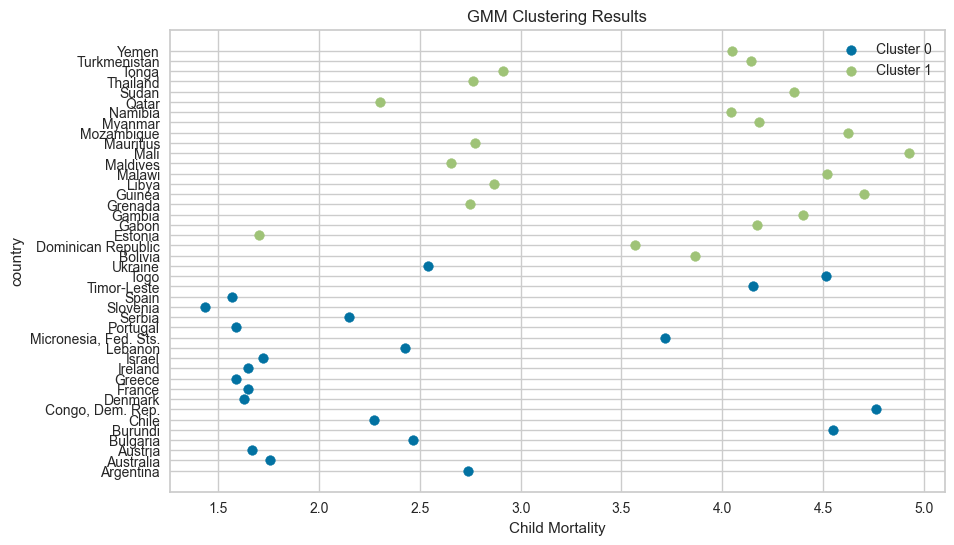

In [ ]:
# Extract clusters for plotting
cluster_0 = df.loc[df['gmm_cluster'] == 0]
cluster_1 = df.loc[df['gmm_cluster'] == 1]
# ... repeat for other clusters ...

# Plot the data points
plt.figure(figsize=(10, 6))

# Loop through each cluster and plot
for i in range(n_clusters):
    cluster = df.loc[df['gmm_cluster'] == i]
    plt.scatter(cluster['child_mort'], cluster['country'], label=f'Cluster {i}')

plt.xlabel('Child Mortality')
plt.ylabel('country')
plt.legend()
plt.title('GMM Clustering Results')
plt.show()

### 8.3.2

In [ ]:
best_k = 0
best_score = -1

for k in range(2, 20):
    gmm = GaussianMixture(n_components=k, random_state=42)
    labels = gmm.fit_predict(X_pca)
    if len(set(labels)) > 1:
        score = silhouette_score(X_pca, labels)
        if score > best_score:
            best_k = k
            best_score = score

print(f"Best K: {best_k}, Best Silhouette Score: {best_score}")

Best K: 2, Best Silhouette Score: 0.43781214662944246


For Gaussian Mixture Model (GMM) clustering, the optimal number of clusters is 2, with a Silhouette Score of approximately 0.438. This score reflects a moderate degree of cluster separation, indicating that the clusters are fairly distinct.

## Comparing Result

In [ ]:
# Comparing results:
(df[['country','agglom','kmeans','gmm_cluster']]
 .groupby(['country','agglom','kmeans','gmm_cluster'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))

,,,,number
country,agglom,kmeans,gmm_cluster,
Argentina,0.0,1.0,0.0,1
Australia,1.0,1.0,0.0,1
Austria,1.0,1.0,0.0,1
Bolivia,0.0,0.0,1.0,1
Bulgaria,0.0,0.0,0.0,1
Burundi,1.0,1.0,0.0,1
Chile,0.0,1.0,0.0,1
"Congo, Dem. Rep.",0.0,0.0,0.0,1
Denmark,1.0,1.0,0.0,1


## 8.4 - DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

best_eps = 0
best_score = -1

for eps in np.arange(0.1, 1.6, 0.1):
    dbscan = DBSCAN(eps=eps)
    labels = dbscan.fit_predict(X_pca)
    if len(set(labels)) > 1:  # Avoid cases where all points are in the same cluster
        score = silhouette_score(X_pca, labels)
        if score > best_score:
            best_eps = eps
            best_score = score

print(f"Best EPS: {best_eps}, Best Silhouette Score: {best_score}")

Best EPS: 1.4000000000000001, Best Silhouette Score: 0.4173737359040407


For DBSCAN clustering, the optimal epsilon (EPS) value is approximately 1.4, yielding a Silhouette Score of about 0.417. This score suggests moderate cluster quality, indicating reasonable separation among clusters.

# Comparing Models Performence

In [ ]:
# comparing the silhouette scores for each model
scores = {
    'Model': ['KMeans', 'Agglomerative', 'GMM', 'DBSCAN'],
    'Silhouette Score': [0.447806, 0.431159, 0.437812, 0.417374]
}

# Create a DataFrame
scores_df = pd.DataFrame(scores)

# Print the DataFrame
scores_df

,Model,Silhouette Score
0,KMeans,0.447806
1,Agglomerative,0.431159
2,GMM,0.437812
3,DBSCAN,0.417374


The Silhouette Scores for different clustering models are as follows: KMeans achieved a score of 0.448, Agglomerative clustering scored 0.431, GMM reached 0.438, and DBSCAN had a score of 0.417. KMeans performed the best among these models.

## 9 Conclusion

**Model Conclusion:**

The analysis of child mortality data revealed key insights into factors influencing mortality rates. Data preprocessing involved addressing missing values and skewness through transformations, enhancing regression analysis readiness.

Significant predictors like income, health expenditures, and fertility rates were identified, demonstrating their strong correlation with child mortality. Clustering models such as KMeans and GMM highlighted distinct groupings in the data, while PCA helped in reducing dimensionality and visualizing feature importance. Overall, the findings emphasize the critical role of socio-economic factors in affecting child mortality rates.

## 10 Next Steps

1. **Refine Clustering Models**: Experiment with different hyperparameters and additional clustering techniques to improve the accuracy of the models.
2. **Integrate Additional Data**: Consider incorporating more variables, such as health service accessibility or environmental factors, to enhance the predictive capabilities of the models.
3. **Develop Predictive Models**: Transition from unsupervised to supervised learning techniques to create predictive models based on the insights gained from clustering.


## 11 Key Insights

- Certain socio-economic factors, such as income levels and education, are strongly correlated with child mortality rates.
- Clustering analysis identified specific regions that exhibit similar socio-economic characteristics, which can be crucial for targeted health initiatives.


## 12 Suggestion

- Collaborate with local health organizations to gather additional data that could provide deeper insights into the root causes of child mortality.
- Utilize the clustering results to create visual dashboards that can effectively communicate findings to stakeholders and aid in decision-making processes.

##  References

**M Abbas. 2024. Analysis of Child Mortality Factors. Personal research project.**